In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv("empathy.csv")
df.head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Unnamed: 70,empathy_score
0,6777340,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,4688.0,2924.0,NaN,NaN,NaN,13
1,6785675,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,4688.0,2924.0,NaN,NaN,NaN,19
2,6794004,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,4688.0,2924.0,NaN,NaN,NaN,15
3,6802338,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,4688.0,2924.0,NaN,NaN,NaN,18
4,6810673,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,4688.0,2924.0,NaN,NaN,NaN,20


In [170]:
categorical_columns = ['Sensor', 'Project name', 'Export date', 'Participant name', 'Recording name',
                       'Timeline name', 'Recording Fixation filter name', 'Recording software version',
                       'Presented Stimulus name', 'Presented Media name', 'Eye movement type']

# Get rid of the category columns
df = df.drop(columns=categorical_columns)

In [171]:
missing_values = df.isna().sum()
print(missing_values)


Recording timestamp             0
Computer timestamp              0
Recording date                  0
Recording date UTC              0
Recording start time            0
                             ... 
Fixation point Y (MCSnorm)    351
Mouse position X              839
Mouse position Y              839
Unnamed: 70                   852
empathy_score                   0
Length: 61, dtype: int64


In [172]:
df.shape

(852, 61)

In [173]:
df.describe

<bound method NDFrame.describe of      Recording timestamp  Computer timestamp Recording date  \
0                6777340        5.150000e+11     30.09.2020   
1                6785675        5.150000e+11     30.09.2020   
2                6794004        5.150000e+11     30.09.2020   
3                6802338        5.150000e+11     30.09.2020   
4                6810673        5.150000e+11     30.09.2020   
..                   ...                 ...            ...   
847             13660143        5.150000e+11     30.09.2020   
848             13668509        5.150000e+11     30.09.2020   
849             13676800        5.150000e+11     30.09.2020   
850             13685119        5.150000e+11     30.09.2020   
851             13693454        5.150000e+11     30.09.2020   

    Recording date UTC Recording start time Recording start time UTC  \
0           30.09.2020              53:17.0                  53:17.0   
1           30.09.2020              53:17.0                  53:1

In [174]:
df['Eye movement type index']

0      20
1      20
2      20
3      20
4      20
       ..
847    44
848    44
849    44
850    44
851    44
Name: Eye movement type index, Length: 852, dtype: int64

In [175]:
column_names = {'Recording timestamp': 'recording_timestamp', 'Computer timestamp': 'computer_timestamp', 'Sensor': 'sensor', 'Project name': 'project_name', 'Participant name': 'participant_name', 'Recording date': 'recording_date', 'Recording date UTC': 'recording_date_utc', 'Recording start time': 'recording_start_time', 'Recording start time UTC': 'recording_start_time_utc', 'Timeline name': 'timeline_name', 'Gaze point X': 'gaze_point_x', 'Gaze point Y': 'gaze_point_y', 'Gaze point left X': 'gaze_point_left_x', 'Gaze point left Y': 'gaze_point_left_y', 'Gaze point right X': 'gaze_point_right_x', 'Gaze point right Y': 'gaze_point_right_y', 'Gaze direction left X': 'gaze_direction_left_x', 'Gaze direction left Y': 'gaze_direction_left_y', 'Gaze direction left Z': 'gaze_direction_left_z', 'Gaze direction right X': 'gaze_direction_right_x','Gaze direction right Y': 'gaze_direction_right_y', 'Gaze direction right Z': 'gaze_direction_right_z', 'Pupil diameter left': 'pupil_diameter_left', 'Pupil diameter right': 'pupil_diameter_right', 'Presented Stimulus name': 'presented_stimulus_name', 'Presented Media width': 'presented_media_width', 'Presented Media height': 'presented_media_height', 'Fixation point X': 'fixation_point_x', 'Fixation point Y': 'fixation_point_y', 'Fixation point X (MCSnorm)': 'fixation_point_x_norm', 'Fixation point Y (MCSnorm)': 'fixation_point_y_norm'}
df.rename(columns=column_names, inplace=True)

In [176]:
df['gaze_direction_left_z'] = df['gaze_direction_left_z'].astype(bool)
df['gaze_direction_right_z'] = df['gaze_direction_right_z'].astype(bool)


In [177]:
df['gaze_point_x'] = df['gaze_point_x'] / df['presented_media_width']
df['gaze_point_y'] = df['gaze_point_y'] / df['presented_media_height']
df['gaze_point_left_x'] = df['gaze_point_left_x'] / df['presented_media_width']
df['gaze_point_left_y'] = df['gaze_point_left_y'] / df['presented_media_height']
df['gaze_point_right_x'] = df['gaze_point_right_x'] / df['presented_media_width']
df['gaze_point_right_y'] = df['gaze_point_right_y'] / df['presented_media_height']



<Axes: xlabel='gaze_point_x', ylabel='Count'>

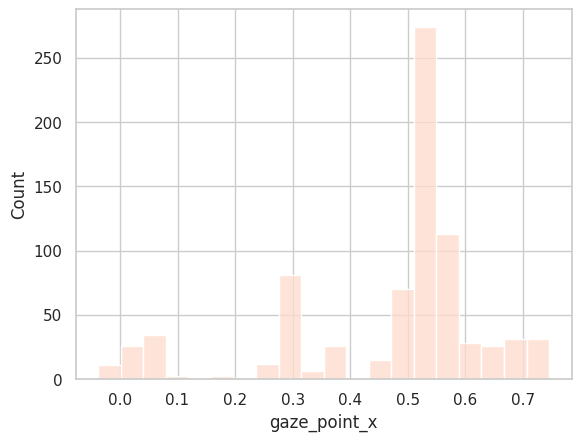

In [178]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Reds')
sns.histplot(df['gaze_point_x'])

<ipython-input-179-50dbab1b3b48>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


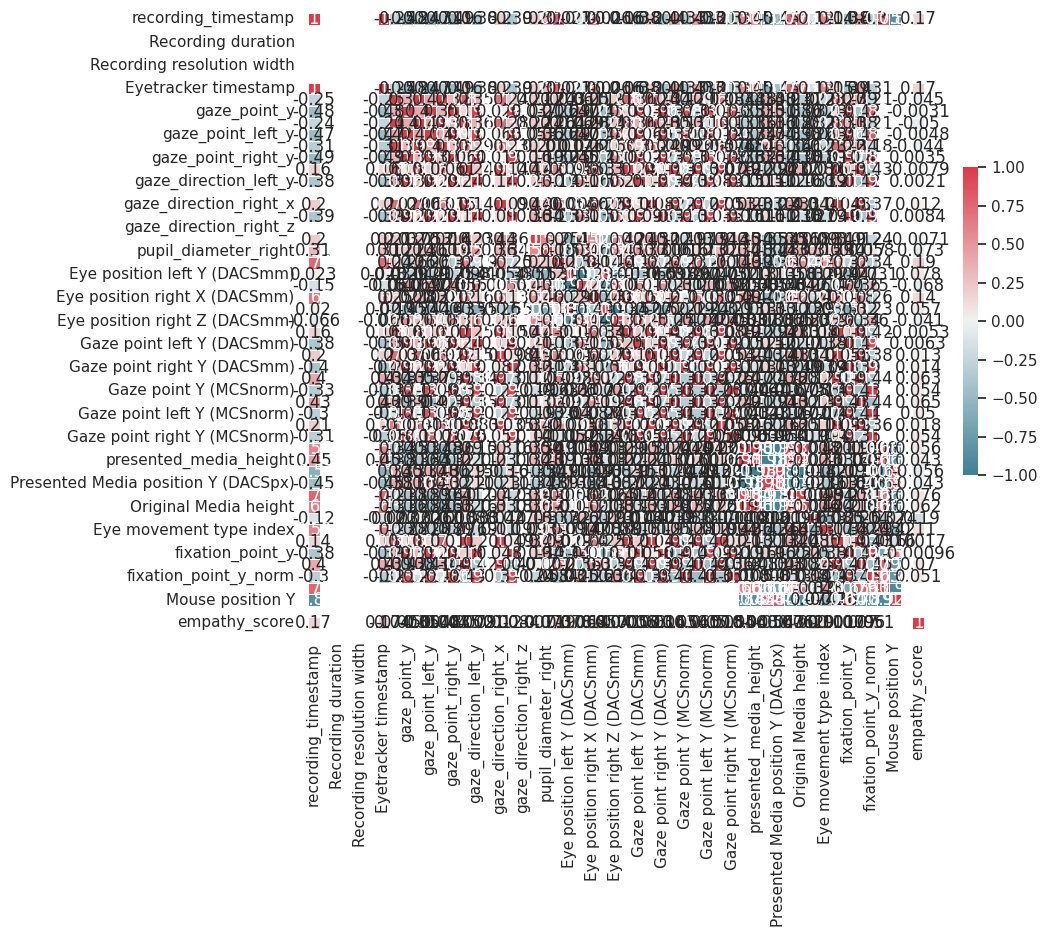

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

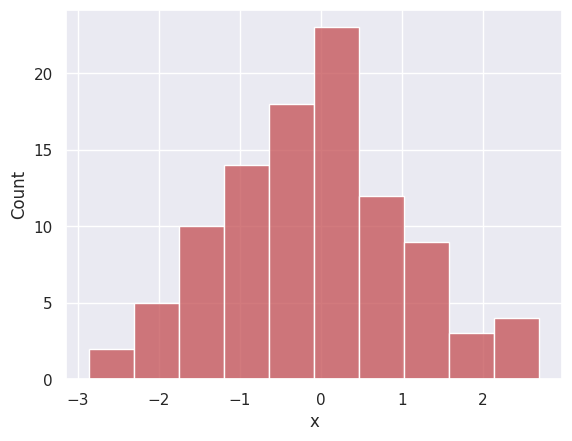

In [180]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

data = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
plot_type = np.random.choice(['scatter', 'line', 'histogram', 'kde'])

color = 'r'

if plot_type == 'scatter':
    sns.scatterplot(x='x', y='y', data=data, color=color)
elif plot_type == 'line':
    sns.lineplot(x='x', y='y', data=data, color=color)
elif plot_type == 'histogram':
    sns.histplot(x='x', data=data, color=color)
else:
    sns.kdeplot(x='x', data=data, color=color)

plt.show()

<Axes: ylabel='Count'>

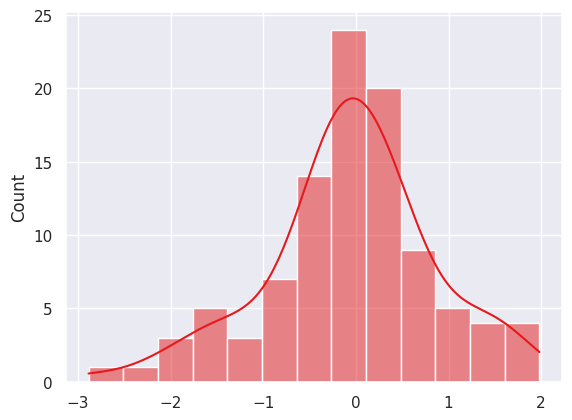

In [181]:
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
sns.set_palette("Set1")
data = np.random.normal(loc=0, scale=1, size=100)
sns.histplot(data, kde=True)

<Axes: xlabel='gaze_point_x', ylabel='gaze_point_y'>

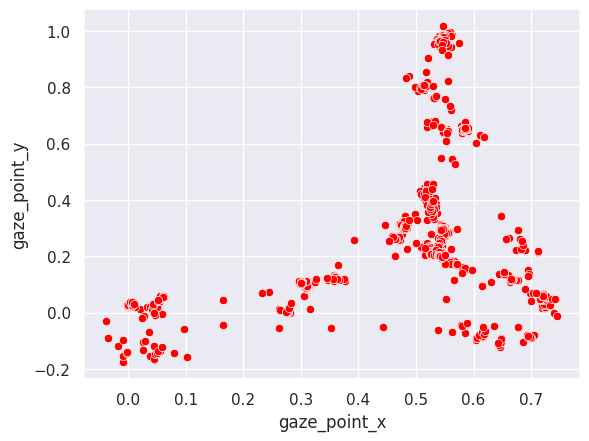

In [182]:
import seaborn as sns
sns.scatterplot(x='gaze_point_x', y='gaze_point_y', data=df, color='red')

In [183]:
df.columns

Index(['recording_timestamp', 'computer_timestamp', 'recording_date',
       'recording_date_utc', 'recording_start_time',
       'recording_start_time_utc', 'Recording duration',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Eyetracker timestamp', 'Event',
       'Event value', 'gaze_point_x', 'gaze_point_y', 'gaze_point_left_x',
       'gaze_point_left_y', 'gaze_point_right_x', 'gaze_point_right_y',
       'gaze_direction_left_x', 'gaze_direction_left_y',
       'gaze_direction_left_z', 'gaze_direction_right_x',
       'gaze_direction_right_y', 'gaze_direction_right_z',
       'pupil_diameter_left', 'pupil_diameter_right', 'Validity left',
       'Validity right', 'Eye position left X (DACSmm)',
       'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
       'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)',
       'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)',
       'Gaze point l

In [184]:
df = df.apply(pd.to_numeric, errors='coerce')

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Create a custom function that will change commas to periods in several columns
def replace_commas(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Specifying colums with comma seperated alues
comma_columns = ['gaze_point_x', 'fixation_point_x_norm']

# For replacing commas and periods applying custom function
replace_commas(df, comma_columns)


df['gaze_point_x'] = df['gaze_point_x'].astype(str).str.replace(',', '.').astype(float)
df['fixation_point_x_norm'] = df['fixation_point_x_norm'].astype(str).str.replace(',', '.').astype(float)

df_cleaned = df.dropna(axis=1, how='any')
X = df_cleaned.drop(columns="empathy_score",axis=1)
y = df_cleaned['empathy_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [210]:


missing_values = df.isna()
missing_counts = missing_values.sum()

print(missing_counts)


recording_timestamp        0
computer_timestamp         0
recording_date           852
recording_date_utc       852
recording_start_time     852
                        ... 
fixation_point_y_norm    351
Mouse position X         839
Mouse position Y         839
Unnamed: 70              852
empathy_score              0
Length: 61, dtype: int64


In [187]:
print(X)
print(y)

     recording_timestamp  computer_timestamp  recording_date  \
0                6777340        5.150000e+11             NaN   
1                6785675        5.150000e+11             NaN   
2                6794004        5.150000e+11             NaN   
3                6802338        5.150000e+11             NaN   
4                6810673        5.150000e+11             NaN   
..                   ...                 ...             ...   
847             13660143        5.150000e+11             NaN   
848             13668509        5.150000e+11             NaN   
849             13676800        5.150000e+11             NaN   
850             13685119        5.150000e+11             NaN   
851             13693454        5.150000e+11             NaN   

     recording_date_utc  recording_start_time  recording_start_time_utc  \
0                   NaN                   NaN                       NaN   
1                   NaN                   NaN                       NaN   
2     

In [198]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Creating a fit and HistGradientBoostingRegressor
regressor = HistGradientBoostingRegressor()
regressor.fit(X_train, y_train)




HistGradientBoostingRegressor()

In [199]:
y_pred = regressor.predict(X_test)
y_pred

array([16.99985123, 17.00089332, 16.88330817, 16.99992054, 17.0963384 ,
       16.99795113, 16.99672399, 16.99999148, 15.48516113, 16.99997038,
       15.48516113, 16.98178974, 16.99981662, 17.00014215, 16.9999915 ,
       17.00000081, 16.99999833, 16.99943222, 16.99992054, 17.00148198,
       16.96586582, 17.00013261, 16.99943222, 16.99504956, 16.99504956,
       15.48516113, 16.99999408, 17.00008263, 16.99943222, 16.73614719,
       17.00089332, 16.612725  , 16.99983406, 16.99943222, 16.99999825,
       16.9999915 , 16.99999824, 16.99997038, 17.06232867, 16.99999814,
       17.00005833, 16.99833526, 15.58990299, 16.98122874, 16.99999849,
       16.99981662, 17.00005833, 16.99997038, 16.99999818, 17.00089332,
       16.89032259, 16.99999408, 16.96556323, 17.00709839, 16.99999961,
       16.99697175, 16.99672399, 17.00229259, 17.00072226, 16.99789889,
       17.00051805, 16.99960918, 16.99984342, 16.99999787, 17.00059974,
       17.00709839, 15.48516113, 16.96556323, 16.997678  , 17.00

In [201]:
from sklearn.linear_model import Lasso

# creating a lesso regression model
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array([17.12718173, 17.00018977, 16.88568716, 17.0242415 , 16.85180061,
       17.04355435, 16.9859245 , 16.83260649, 16.5312319 , 16.82236937,
       16.52781957, 17.0531988 , 17.00587721, 16.99047463, 16.82995553,
       17.0155712 , 16.93713255, 16.86694299, 17.02386498, 17.18898333,
       16.69203893, 17.01016791, 16.86808193, 16.76360452, 16.76398073,
       16.53009446, 16.89883854, 17.01113997, 16.86163489, 16.8491487 ,
       16.99829428, 16.53805833, 16.99597119, 16.86618644, 17.02225122,
       16.83185048, 17.0065165 , 16.82312924, 16.88796209, 16.9796229 ,
       17.01988119, 16.88412639, 16.91483357, 17.16656388, 16.93409939,
       17.00246789, 17.0206432 , 16.82199034, 17.02490595, 16.99981366,
       16.97812842, 16.99047462, 16.6886276 , 16.87350711, 16.92575809,
       17.11369693, 16.98554461, 16.93895777, 17.03564146, 17.06915013,
       17.03825094, 17.01433938, 17.03504712, 16.99161161, 17.00777534,
       16.8773006 , 16.53426565, 16.68748807, 17.15085451, 17.01

In [206]:
from sklearn.linear_model import ElasticNet

# Create and fit an ElasticNet Regression model
regressor = ElasticNet()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred


array([17.1005459 , 17.00341631, 16.90539795, 17.02009496, 16.86863476,
       17.04040741, 16.98576934, 16.83804547, 16.50824285, 16.82648662,
       16.50438995, 17.05427402, 17.00983807, 16.98643462, 16.83505225,
       17.03565765, 16.95157319, 16.86936597, 17.01966982, 17.15541907,
       16.68531052, 17.01765045, 16.87065196, 16.7646098 , 16.76503458,
       16.50695855, 16.91429806, 17.00082492, 16.86337253, 16.86564046,
       17.00127608, 16.51595065, 16.98667922, 16.86851173, 17.03426619,
       16.83719186, 17.02097078, 16.8273446 , 16.9079666 , 16.99209881,
       17.0002654 , 16.87388474, 16.90550119, 17.17184046, 16.94814841,
       17.00598856, 17.0011258 , 16.82605866, 17.03726368, 17.00299163,
       17.00976211, 16.99690844, 16.68145875, 16.86189438, 16.94171169,
       17.08829995, 16.9853404 , 16.96107262, 17.01061124, 17.04992635,
       17.02696244, 17.02236051, 17.01589569, 16.99819223, 17.01198127,
       16.86617766, 16.5116683 , 16.68017208, 17.15261666, 17.03

In [207]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit a GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred



array([16.99892521, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99892521, 16.99856325, 16.99892521, 10.391239  , 16.99892521,
       18.70112872, 16.99856325, 16.99892521, 16.99856325, 16.99892521,
       16.99892521, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99892521, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       18.17891102, 16.99892521, 16.99856325, 16.99892521, 16.99892521,
       16.99892521, 19.22787169, 16.99856325, 16.99892521, 16.99892521,
       16.99892521, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99892521, 16.99892521, 14.77211959, 16.99856325, 16.99892521,
       16.99892521, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99856325, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99892521, 16.99856325, 16.99892521, 16.99892521, 16.99856325,
       16.99856325, 16.99892521, 16.99892521, 16.99892521, 16.99892521,
       16.99892521, 10.59317491, 16.99892521, 16.99892521, 16.99

In [209]:
from sklearn.metrics import mean_squared_error

models = [
    ("HistGradientBoostingRegressor", HistGradientBoostingRegressor()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("GradientBoostingRegressor", GradientBoostingRegressor())
]

# Iterate through models
for model_name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print MSE and RMSE
    print(f"Model: {model_name}")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print()


Model: HistGradientBoostingRegressor
Mean Squared Error (MSE): 0.5955850121234555
Root Mean Squared Error (RMSE): 0.7717415448992334

Model: Lasso
Mean Squared Error (MSE): 0.8187883603896925
Root Mean Squared Error (RMSE): 0.9048692504388093

Model: ElasticNet
Mean Squared Error (MSE): 0.8114575572009334
Root Mean Squared Error (RMSE): 0.9008093900492675

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 1.2634194869256072
Root Mean Squared Error (RMSE): 1.1240193445513325

